# [Lab Session 2](otsu.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 2.1.]()** Implement Otsu thresholding as a re-usable function:

In [ ]:
#imgf = plt.imread("data/NIH3T3/im/dna-0.png")

In [19]:
def otsu_thresholding(imgf):
    img8 = (imgf * 255).round().astype(np.uint8)
    flat = np.zeros(256)

    for i in range(0,256):
        a = img8 == i
        flat[i] = a.sum()

    pen = np.zeros(256)
    for i in range(0,256):
        g_klein = flat[0:i]
        g_groß = flat[i:256]
        g_k = g_klein.sum()
        g_g = g_groß.sum()
        sigma1 = np.var(img8[img8 < i])
        sigma2 = np.var(img8[img8 >= i])
        pen[i] = g_k * sigma1 + g_g * sigma2


    pen1 = pen[~np.isnan(pen)]
    min_pen = min(pen1)
    minim = np.where(pen == min_pen)[0][0]
    x = minim
    img5 = img8
    a = img5 > x
    b = img5 <= x
    img5[a]= 1
    img5[b] = 0

    seg = img5
    
    return seg

/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


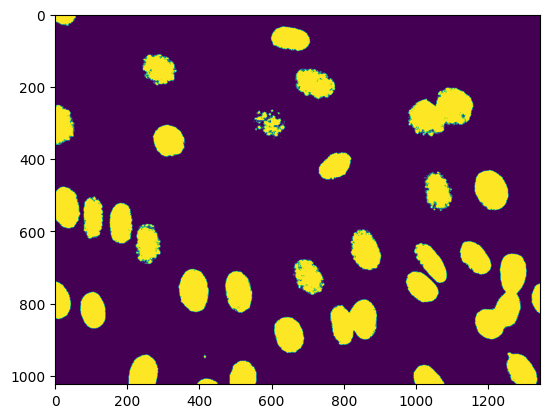

In [20]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")
imgf_ot = otsu_thresholding(imgf)
plt.imshow(imgf_ot)

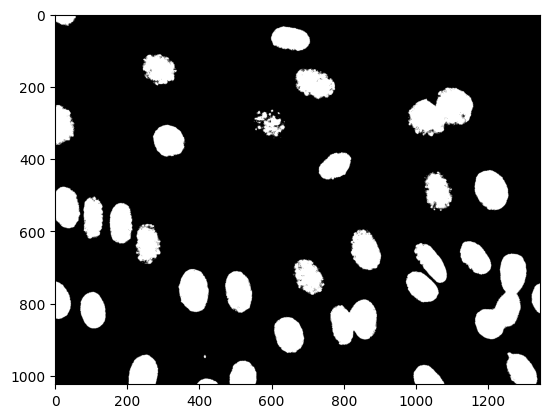

In [13]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")
imgf_otsu = otsu_thresholding(imgf)
imgf_otsu

**[Task 2.2.]()** Implement a re-usable function to compute the Dice coefficient:

In [42]:
def compute_dice(bin1, bin2):
    #assert überprüft, ob bin1 den Typ np.bool haben 
    assert bin1.dtype == bool
    assert bin2.dtype == bool
    
    D0 = 2* bin1*bin2
    D1 = D0.sum()
    D2 = bin1.sum()+bin2.sum()
    dice = D1/D2


    
    return dice

In [44]:
#type(imgf_ot)
#type(imgk)
imgk.dtype
imgf_ot.dtype
imgk_bool = imgk.astype(bool)
imgf_bool = imgf_ot.astype(bool)

In [45]:

imgk = plt.imread("data/NIH3T3/gt/0.png")
compute_dice(imgk_bool, imgf_bool)

#brotha imgf_otsu ist ein image und kein boolean arraay üff sikerem amenakoi. muss noch boolean machen aber kriegst du hin du geile sau
#benim ollum ya 



0.8701113873987207

**[Task 2.3.]()** Test your implementations from above:

In [46]:
imgk = plt.imread("data/NIH3T3/gt/0.png")
compute_dice(imgk_bool, imgf_bool)

#brotha imgf_otsu ist ein image und kein boolean arraay üff sikerem amenakoi. muss noch boolean machen aber kriegst du hin du geile sau
#benim ollum ya 



0.8701113873987207

The result should be the same as in your [otsu.ipynb](otsu.ipynb) notebook.

**[Task 2.4.]()** Perform batch processing:

In [62]:
seq = ([28, 29, 33, 44, 26, 49])
for i in seq: 
    #dicecoef = np.zeros(6)
    img_i = plt.imread(f"data/NIH3T3/im/dna-{i}.png")
    otsu_thresholding(img_i)
    img_ground = plt.imread(f"data/NIH3T3/gt/{i}.png")
    img_i_bool = img_i.astype(bool)
    img_ground_bool = img_ground.astype(bool)
    dice = compute_dice(img_i_bool, img_ground_bool)
    #dicecoef[] = dice
    print(dice)


#print(dicecoef)


0.3158152367118249
0.28370685279662594
0.2912938620315046
0.4090528400233743
0.35935387733206176
0.4014820708339262


In [63]:
(0.3158 + 0.2837 + 0.2913 + 0.4091 + 0.3594 + 0.4015)/6

0.34346666666666664